# DBSCAN Implementation

In [1]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

# Generate Sample Dataset

In [2]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Helper Functions

In [3]:
def model_performance(labels, labels_true):
    n_clusters = len(set(labels)) - 1 

    print
    print("       //============MODEL PERFORMANCE============//")
    print
    print("         +---------------------------------------+")
    print('         |  Estimated number of clusters: %d      |' % n_clusters)
    print("         |  Homogeneity:                  %0.3f  |" % metrics.homogeneity_score(labels_true, labels))
    print("         |  Completeness:                 %0.3f  |" % metrics.completeness_score(labels_true, labels))
    print("         |  V-measure:                    %0.3f  |" % metrics.v_measure_score(labels_true, labels))
    print("         |  Adjusted Rand Index:          %0.3f  |"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("         |  Adjusted Mutual Information:  %0.3f  |"
          % metrics.adjusted_mutual_info_score(labels_true, labels))
    print("         |  Silhouette Coefficient:       %0.3f  |"
          % metrics.silhouette_score(X, labels))
    print("         +---------------------------------------+")


In [4]:
def plot_clusters(X, labels):    
    X_noise = X[labels == -1]
    X_core = X[labels != -1]
    labels_core = labels[labels != -1]
    
    
    plt.scatter(X_noise[:, 0], X_noise[:, 1],
                marker='.',
                s=200,
                lw=0,
                alpha=0.7,
                c= 'black')

    plt.scatter(X_core[:, 0], X_core[:, 1],
                marker='.',
                s=300,
                lw=0,
                alpha=0.7,
                c= labels_core,
                cmap=plt.cm.Set1)

# Sklearn DBSCAN Model


       //============MODEL PERFORMANCE============//

         +---------------------------------------+
         |  Estimated number of clusters: 3      |
         |  Homogeneity:                  0.953  |
         |  Completeness:                 0.883  |
         |  V-measure:                    0.917  |
         |  Adjusted Rand Index:          0.952  |
         |  Adjusted Mutual Information:  0.883  |
         |  Silhouette Coefficient:       0.626  |
         +---------------------------------------+


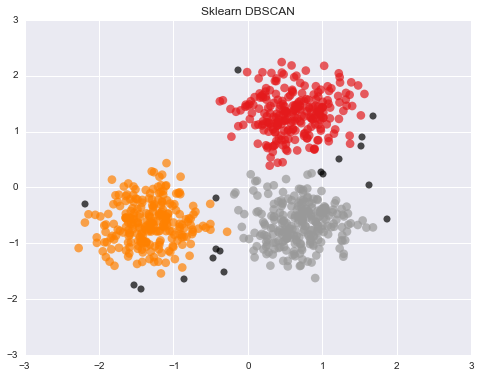

In [5]:
# sklearn DBSCAN performance
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

model_performance(labels, labels_true)

plot_clusters(X, labels)
plt.title("Sklearn DBSCAN")
plt.show()

# My Implementation of DBSCAN

In [34]:
from DBSCAN import DBSCAN

db = DBSCAN(epsilon = 0.3, min_samples = 10) 
labels = db.fit(X)

print "Number of Points in Cluster 1: ", len(labels[labels==0])
print "Number of Points in Cluster 2: ", len(labels[labels==1])
print "Number of Points in Cluster 3: ", len(labels[labels==2])
print "Number of Points in Noise:     ", len(labels[labels==-1])

Number of Points in Cluster 1:  243
Number of Points in Cluster 2:  244
Number of Points in Cluster 3:  245
Number of Points in Noise:      18



       //============MODEL PERFORMANCE============//

         +---------------------------------------+
         |  Estimated number of clusters: 3      |
         |  Homogeneity:                  0.953  |
         |  Completeness:                 0.883  |
         |  V-measure:                    0.917  |
         |  Adjusted Rand Index:          0.952  |
         |  Adjusted Mutual Information:  0.883  |
         |  Silhouette Coefficient:       0.626  |
         +---------------------------------------+


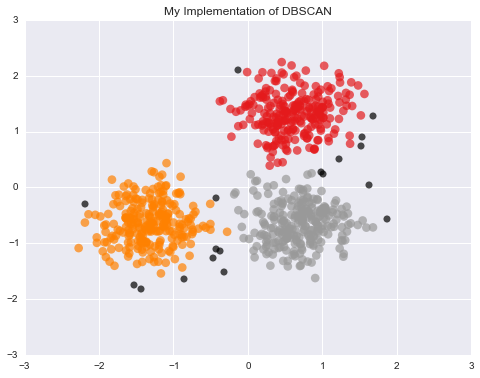

In [35]:
model_performance(labels, labels_true)
plot_clusters(X, labels)
plt.title("My Implementation of DBSCAN")
plt.show()

### Model performance is identical to sklearn's implemenation

### Dispersion of Clusters

In [29]:
def compute_disperstion(X, labels):    
    n_clusters = len(set(labels)) - 1

    def compute_new_centroid(n):
        return np.mean(X[labels == n], axis=0)

    centroids = np.array(map(compute_new_centroid,
                             range(n_clusters)))

    def intra_cluster_dist(n):
        return np.linalg.norm(X[labels == n] - centroids[n])**2

    # Dispersion
    return sum(map(intra_cluster_dist,
                   range(n_clusters)))

dispersion = compute_disperstion(X, labels)
print "Dispersion of clusters: ", dispersion
print "Can't make an Elbow Plot because in DBSCAN you can't set k"

Dispersion of clusters:  191.749592629
Can't make an Elbow Plot because in DBSCAN you can't set k


## Generate Noise

In [13]:
def generate_noise(X):
    min_max = zip(np.min(X, axis = 0), np.max(X,axis = 0))
    return np.array(map(lambda t:
                        np.random.uniform(t[0], t[1], size = X.shape[0]),
                        min_max)).T

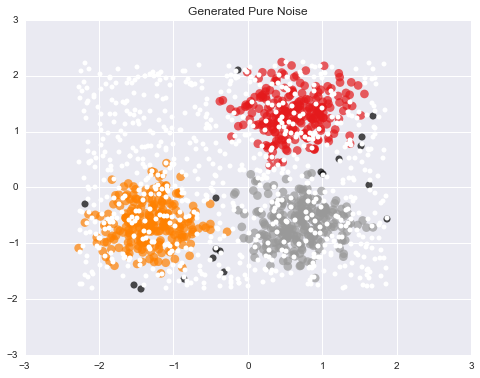

In [18]:
X_noise = generate_noise(X)
plot_clusters(X, labels)
plt.scatter(X_noise[:,0],X_noise[:,1],
                marker='.',
                s=100,
                lw=0,
                alpha=1,
                c= 'white')
plt.title("Generated Pure Noise");

## Clustering on Noise

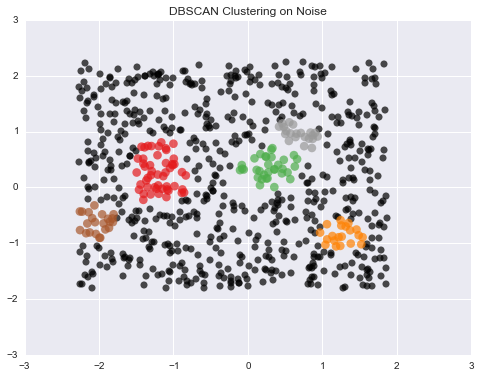

In [42]:
db = DBSCAN(epsilon = 0.3, min_samples = 20) 
labels_noise = db.fit(X_noise)

plot_clusters(X_noise, labels_noise)
plt.title("DBSCAN Clustering on Noise")
plt.show()

In [39]:
def noise_log_dispersion(X):
    # Compute disperion of noise data 10 times
    k_dispersion = []
    for _ in  range(10):
        db = DBSCAN(epsilon = 0.3, min_samples = 10) 
        labels = db.fit(X)
        k_dispersion.append(np.log(compute_disperstion(X, labels)))
    return k_dispersion

In [33]:
def gap_statistic(X, labels):
    data_dispersion = np.log(compute_disperstion(X, labels))
    
    # Generate noise
    X_noise = generate_noise(X)
    noise_dispersion = noise_log_dispersion(X_noise)
    
    noise_mean_dispersion = np.mean(noise_dispersion)
    noise_std_dispersion = np.std(noise_dispersion)

    
    return noise_mean_dispersion - data_dispersion

In [38]:
print "Gap Statitic of Clusters: ", gap_statistic(X, labels)

Gap Statitic of Clusters:  2.30983713714
